In [2]:
#install only if you have not installed before
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn

#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Pseudonymisation

In [3]:
#Reading in the csv file that includes counselling data
data = pd.read_csv('counseling_dataset.csv')

In [5]:
#Let's look at the column names in the dataset.....
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Full Name          500 non-null    object
 1   Student ID         500 non-null    object
 2   Email              500 non-null    object
 3   Preferred Email    500 non-null    object
 4   Mobile Number      500 non-null    int64 
 5   ZIP                500 non-null    int64 
 6   DoB                500 non-null    object
 7   Sessions Offered   500 non-null    int64 
 8   Sessions Attended  500 non-null    int64 
 9   Gender             500 non-null    object
 10  Ethnicity          500 non-null    object
 11  Study Field        500 non-null    object
 12  Sexual Abuse       500 non-null    int64 
 13  Suicidal           500 non-null    int64 
 14  Self Harm          500 non-null    int64 
 15  Anxiety            500 non-null    int64 
 16  Depression         500 non-null    int64 
 1

#### Question 1

What are direct identifiers in the dataset?

<font color="blue"> Write your answer </font>

#### Question 2

What are the sensitive data items in the dataset?

<font color="blue"> Write your answer </font>

#### Question 3

If this dataset was leaked to unauthorised parties (e.g., malicious actors, general public etc), what could be the impact on the data subjects?

<font color="blue"> Write your answer </font>

### Identify direct identifiers 

In [6]:
direct_ids = ['Full Name','Student ID','Email','Preferred Email','Mobile Number']

### Replace direct identifiers with a pseudonym column

In [7]:
#Add a pseudonym column to the above dataset
#Let's use the counter method
#The pattern of the pseudonym => 'S' follwed by three digit number (e.g., S000, S001,......,S498,S499)
#Name the column as the UID

data.insert(0, 'UID', [f"S{i:03}" for i in range(len(data))], False)
data

,UID,Full Name,Student ID,Email,Preferred Email,Mobile Number,ZIP,DoB,Sessions Offered,Sessions Attended,...,Self Harm,Anxiety,Depression,Eating Disorder,Health,Risk to Others,Anger,Alcohol,Drugs,Smoking
0,S000,David Green-Pickering,dgre6789,dgre6789@university.edu,david366green-pickering@outlook.com,2736225,2031,3/01/1999,19,8,...,0,1,1,1,1,1,0,0,1,0
1,S001,Suzanne Pearce,spea6271,spea6271@university.edu,suzannepearce@icloud.com,2726234,8599,12/09/1986,0,0,...,1,0,0,1,1,1,0,0,0,0
2,S002,Julie Gibson-Forrest,jgib9592,jgib9592@university.edu,julie35gibson-forrest@outlook.com,2784005,9337,15/03/1996,6,5,...,0,1,0,1,1,1,1,0,1,0
3,S003,Hannah Barnes,hbar4405,hbar4405@university.edu,hannah848barnes@outlook.com,2232137,8698,8/08/1997,0,0,...,0,1,0,1,1,1,0,1,0,0
4,S004,Maia Hansen,mhan6405,mhan6405@university.edu,maiahansen@yahoo.com,2197017,2381,1/02/1994,20,9,...,1,1,0,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,S495,Pauline Howell,phow2946,phow2946@university.edu,pauline333howell@outlook.com,2732191,5397,21/10/2000,1,1,...,1,0,0,1,0,0,1,1,1,0
496,S496,Hamish Paterson,hpat2066,hpat2066@university.edu,hamish452paterson@outlook.com,2794832,5354,9/03/1992,10,8,...,1,1,0,0,1,0,0,0,1,0
497,S497,Natasha Butler,nbut900,nbut900@university.edu,natashabutler@yahoo.com,2289142,6978,20/10/1996,1,0,...,1,1,0,0,1,0,0,1,0,0
498,S498,Amy Watt-Parkes,awat7941,awat7941@university.edu,amy_watt-parkes@yahoo.com,2722575,5778,12/10/1991,8,1,...,0,1,1,0,0,1,0,0,1,0


In [8]:
#copy the direct identifying columns to a table called "mapping"
#We will update the "mapping" table later
mapping = data[direct_ids]
mapping

,Full Name,Student ID,Email,Preferred Email,Mobile Number
0,David Green-Pickering,dgre6789,dgre6789@university.edu,david366green-pickering@outlook.com,2736225
1,Suzanne Pearce,spea6271,spea6271@university.edu,suzannepearce@icloud.com,2726234
2,Julie Gibson-Forrest,jgib9592,jgib9592@university.edu,julie35gibson-forrest@outlook.com,2784005
3,Hannah Barnes,hbar4405,hbar4405@university.edu,hannah848barnes@outlook.com,2232137
4,Maia Hansen,mhan6405,mhan6405@university.edu,maiahansen@yahoo.com,2197017
...,...,...,...,...,...
495,Pauline Howell,phow2946,phow2946@university.edu,pauline333howell@outlook.com,2732191
496,Hamish Paterson,hpat2066,hpat2066@university.edu,hamish452paterson@outlook.com,2794832
497,Natasha Butler,nbut900,nbut900@university.edu,natashabutler@yahoo.com,2289142
498,Amy Watt-Parkes,awat7941,awat7941@university.edu,amy_watt-parkes@yahoo.com,2722575


In [9]:
#delete the direct identifiers
data.drop(columns = direct_ids, inplace = True)
data

,UID,ZIP,DoB,Sessions Offered,Sessions Attended,Gender,Ethnicity,Study Field,Sexual Abuse,Suicidal,Self Harm,Anxiety,Depression,Eating Disorder,Health,Risk to Others,Anger,Alcohol,Drugs,Smoking
0,S000,2031,3/01/1999,19,8,Female,Asian,Creative Arts,1,0,0,1,1,1,1,1,0,0,1,0
1,S001,8599,12/09/1986,0,0,Male,Asian,Arts,0,1,1,0,0,1,1,1,0,0,0,0
2,S002,9337,15/03/1996,6,5,Female,Asian,Business,0,1,0,1,0,1,1,1,1,0,1,0
3,S003,8698,8/08/1997,0,0,Other,Asian,Education and Social Work,0,0,0,1,0,1,1,1,0,1,0,0
4,S004,2381,1/02/1994,20,9,Male,Maori,Business,1,0,1,1,0,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,S495,5397,21/10/2000,1,1,Other,Asian,Law,1,1,1,0,0,1,0,0,1,1,1,0
496,S496,5354,9/03/1992,10,8,Male,Asian,Arts,0,0,1,1,0,0,1,0,0,0,1,0
497,S497,6978,20/10/1996,1,0,Female,Pacific,Education and Social Work,0,0,1,1,0,0,1,0,0,1,0,0
498,S498,5778,12/10/1991,8,1,Male,European,Science,1,0,0,1,1,0,0,1,0,0,1,0


### Create a mapping table

In [10]:
#Let' complete the mapping table
#Mapping table should include : pseudonym column (UID) + direct identifiers

#copy the "UID" column from the pseudonymised dataset
mapping.insert(0, 'UID', data['UID'])
mapping

,UID,Full Name,Student ID,Email,Preferred Email,Mobile Number
0,S000,David Green-Pickering,dgre6789,dgre6789@university.edu,david366green-pickering@outlook.com,2736225
1,S001,Suzanne Pearce,spea6271,spea6271@university.edu,suzannepearce@icloud.com,2726234
2,S002,Julie Gibson-Forrest,jgib9592,jgib9592@university.edu,julie35gibson-forrest@outlook.com,2784005
3,S003,Hannah Barnes,hbar4405,hbar4405@university.edu,hannah848barnes@outlook.com,2232137
4,S004,Maia Hansen,mhan6405,mhan6405@university.edu,maiahansen@yahoo.com,2197017
...,...,...,...,...,...,...
495,S495,Pauline Howell,phow2946,phow2946@university.edu,pauline333howell@outlook.com,2732191
496,S496,Hamish Paterson,hpat2066,hpat2066@university.edu,hamish452paterson@outlook.com,2794832
497,S497,Natasha Butler,nbut900,nbut900@university.edu,natashabutler@yahoo.com,2289142
498,S498,Amy Watt-Parkes,awat7941,awat7941@university.edu,amy_watt-parkes@yahoo.com,2722575


In real applications, you might also need to apply pseudonymisation on the fly (e.g., adding a user to a pseudonymised table when the register).

### How Linkage Attacks Work

In this interconnected world, our data is existing in more than one place<br>
Latanya Sweeny once said that 87% of US citizens can be identified by only using gender, DoB and postal code<br>
What does that mean - "AUXILIARY DATA" can be used to compromise privacy<br>

Let's see how we can combine multiple data items to uniqely identify individuals<br>

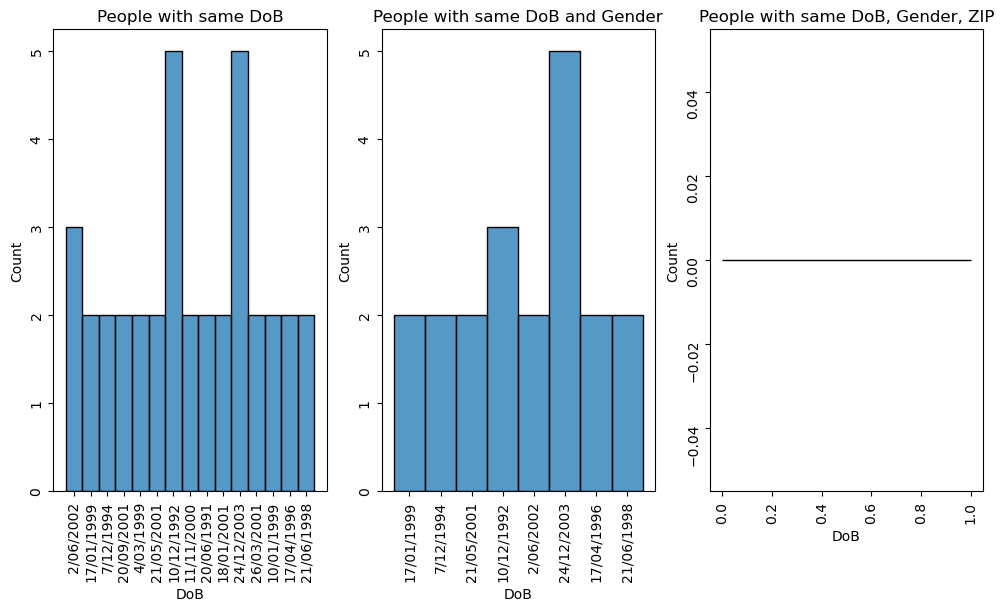

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Plot histogram for duplicates of 'DoB' only
attack1 = data[data.groupby('DoB')['DoB'].transform('size') > 1]
sns.histplot(attack1, x='DoB', ax=axs[0])
axs[0].set_title("People with same DoB")
axs[0].tick_params(rotation=90)


# Find records with duplicate combinations of 'DoB' and 'Gender'
attack2 = data[data.groupby(['DoB', 'Gender'])['DoB'].transform('size') > 1]
sns.histplot(attack2, x='DoB', ax=axs[1])
axs[1].set_title("People with same DoB and Gender")
axs[1].tick_params(rotation=90)


# Find records with duplicate combinations of 'DoB', 'Gender', 'Zip'
attack3 = data[data.groupby(['DoB', 'Gender', 'ZIP'])['DoB'].transform('size') > 1]
sns.histplot(attack3, x='DoB', ax=axs[2])
axs[2].set_title("People with same DoB, Gender, ZIP")
axs[2].tick_params(rotation=90)

Idea behind Sweeny's statement was not limited to (age, zip and gender)<br>
The more background knowledge you have about a person, it is easy to identify them in a dataset<br>

Supose that you are in the research team who recived this pseudonymised counselling dataset. <br>
You have a friend named Jason Read-Joe and you know he attends counselling sessions. <br>
You know his birthday 21/06/1998.<br>
Do you want to find out what issues he have? <br>

In [12]:
data[data['DoB'] == '21/06/1998']

,UID,ZIP,DoB,Sessions Offered,Sessions Attended,Gender,Ethnicity,Study Field,Sexual Abuse,Suicidal,Self Harm,Anxiety,Depression,Eating Disorder,Health,Risk to Others,Anger,Alcohol,Drugs,Smoking
423,S423,5748,21/06/1998,17,9,Male,Asian,Medical and Health Sciences,0,0,0,1,0,0,0,0,1,1,1,1
440,S440,2296,21/06/1998,9,6,Male,Asian,Science,0,0,1,1,0,0,1,0,0,1,1,0
